<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Fashion_recognition_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [35]:
%tensorflow_version 2.x

In [36]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

## Importing data from keras

In [44]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
orig_test = x_test

## Checking data image and shape

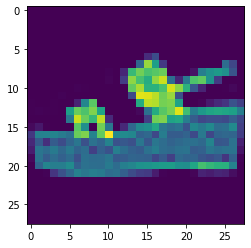

In [45]:
plt.imshow(x_train[12])

In [39]:
x_train.shape

(60000, 28, 28)

## Constructing Hyper Parameters

In [46]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 40

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

## Data preperation

In [47]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [50]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

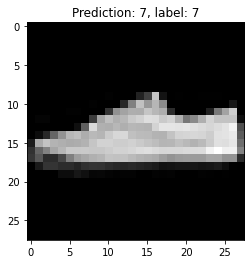

In [124]:
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

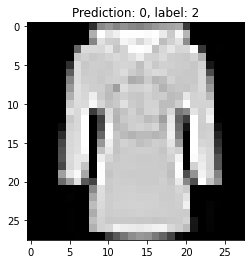

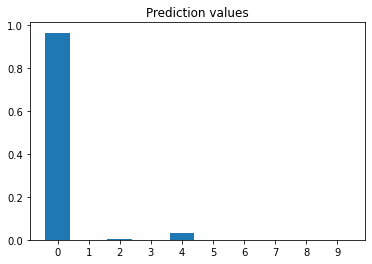

In [77]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()

In [86]:
from skimage import io,transform

Original image shape:(689, 984, 3)


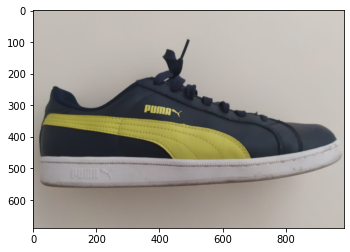

In [87]:
rgb = io.imread('puma.png')
print('Original image shape:{}'.format(rgb.shape))
plt.imshow(rgb)

Grayscale image shape:(689, 984)


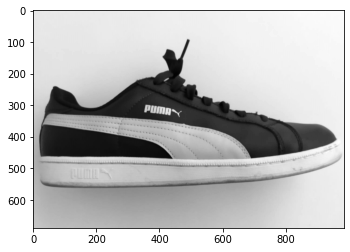

In [88]:
gray = np.dot(rgb[...,:],[0.229,0.587,0.114])
print('Grayscale image shape:{}'.format(gray.shape))
plt.imshow(gray,cmap='gray')

Shape transformed grayscale image shape:(28, 28)


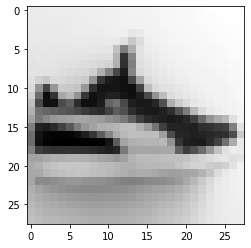

In [89]:
gray28x28 = transform.resize(gray,(img_rows,img_cols))
print('Shape transformed grayscale image shape:{}'.format(gray28x28.shape))
plt.imshow(gray28x28,cmap='gray')

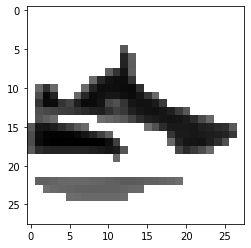

In [90]:
vectorized_filter = np.vectorize(lambda v: 255 if v > 128 else v)
filtered = vectorized_filter(gray28x28)
plt.imshow(filtered,cmap='gray')

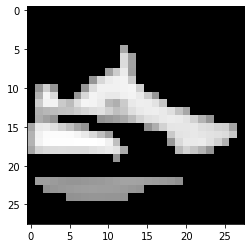

In [91]:
inverted = 255 - filtered
reshaped = inverted.reshape(img_rows,img_cols,1)/255
batch = np.array([reshaped])
plt.imshow(inverted,cmap='gray')

In [92]:
predictions = model.predict(batch)
result = predictions.argmax(1)
print('Tahmin edilen sayı:{}'.format(result[0]))

Tahmin edilen sayı:7


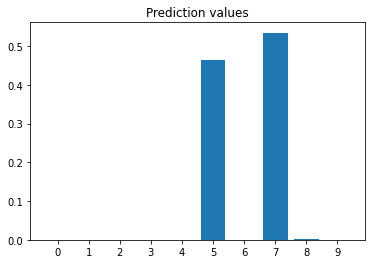

In [125]:
plt.bar(range(10), predictions[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()